In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dff = pd.read_csv('local_weather.csv')

In [5]:
dff.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
dff.isnull().sum()/dff.shape[0] 

STATION    0.000000
NAME       0.000000
DATE       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

- PRCP: PRECIPITATION
- SNOW: SNOWFALL
- SNWD: SNOW DEPTH
- TMAX: MAXIMUM TEMPERATURE
- TMIN: MINIMUM TEMPERATURE

In [7]:
dff.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [8]:
df = dff[['NAME', 'DATE', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD']].copy()

In [9]:
df.columns = ['Station_Name', 'Date', 'Max_Temp', 'Min_Temp', 'Precipitation', 'Snowfall', 'Snow_Depth']

In [10]:
df.isnull().sum()/df.shape[0]

Station_Name     0.000000
Date             0.000000
Max_Temp         0.000534
Min_Temp         0.000593
Precipitation    0.016668
Snowfall         0.324990
Snow_Depth       0.317634
dtype: float64

In [11]:
df['Max_Temp'].isnull().value_counts()  
#  very few missing values in Max_Temp, we can drop those rows.

Max_Temp
False    16850
True         9
Name: count, dtype: int64

In [12]:
df.dropna(subset=['Max_Temp'], inplace=True)

In [13]:
# for min temp and precipitation too very few missing values, we can drop those rows.
df.dropna(subset=['Min_Temp'], inplace=True)
df.dropna(subset=['Precipitation'], inplace=True)

In [14]:
df.isnull().sum()/df.shape[0]

Station_Name     0.000000
Date             0.000000
Max_Temp         0.000000
Min_Temp         0.000000
Precipitation    0.000000
Snowfall         0.315002
Snow_Depth       0.307516
dtype: float64

In [15]:
# large number of missing values in Snowfall and Snow_Depth.
df['Snowfall'].value_counts()  
# mostly theres no snowfall recorded. so that means it doesnt affect weather much. we can drop the column. 

Snowfall
0.0    11346
1.0        1
Name: count, dtype: int64

In [16]:
df.drop(columns=['Snowfall'], inplace=True)

In [17]:
df['Snow_Depth'].value_counts() 
#  drop this column too.

Snow_Depth
0.0    11471
Name: count, dtype: int64

In [18]:
df.drop(columns=['Snow_Depth'], inplace=True)

In [19]:
df.isnull().sum()/df.shape[0]   

Station_Name     0.0
Date             0.0
Max_Temp         0.0
Min_Temp         0.0
Precipitation    0.0
dtype: float64

In [20]:
df['Station_Name'].nunique()  # theres only one station, OAKLAND INTERNATIONAL AIRPORT, CA US. so we can drop this column.
df.drop(columns=['Station_Name'], inplace=True)

In [21]:
df.head()

,Date,Max_Temp,Min_Temp,Precipitation
0,1960-01-01,49.0,30.0,0.0
1,1960-01-02,49.0,29.0,0.0
2,1960-01-03,54.0,35.0,0.0
3,1960-01-04,54.0,36.0,0.0
4,1960-01-05,55.0,33.0,0.0


In [22]:
df.dtypes

Date              object
Max_Temp         float64
Min_Temp         float64
Precipitation    float64
dtype: object

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.dtypes

Date             datetime64[ns]
Max_Temp                float64
Min_Temp                float64
Precipitation           float64
dtype: object

In [25]:
# acc to data documentation, 9999 means missing data or the data wasnt recorded.
df.apply(lambda x: (x==9999)).sum()  
# no such values present in the dataframe.

Date             0
Max_Temp         0
Min_Temp         0
Precipitation    0
dtype: int64

In [26]:
df[['Max_Temp', 'Min_Temp']].describe()

,Max_Temp,Min_Temp
count,16565.000000,16565.000000
mean,65.691518,50.396378
std,8.403836,6.747925
min,38.000000,1.000000
25%,60.000000,46.000000
50%,65.000000,51.000000
75%,71.000000,56.000000
max,122.000000,69.000000


Text(0.5, 1.0, 'Number of Records per Year')

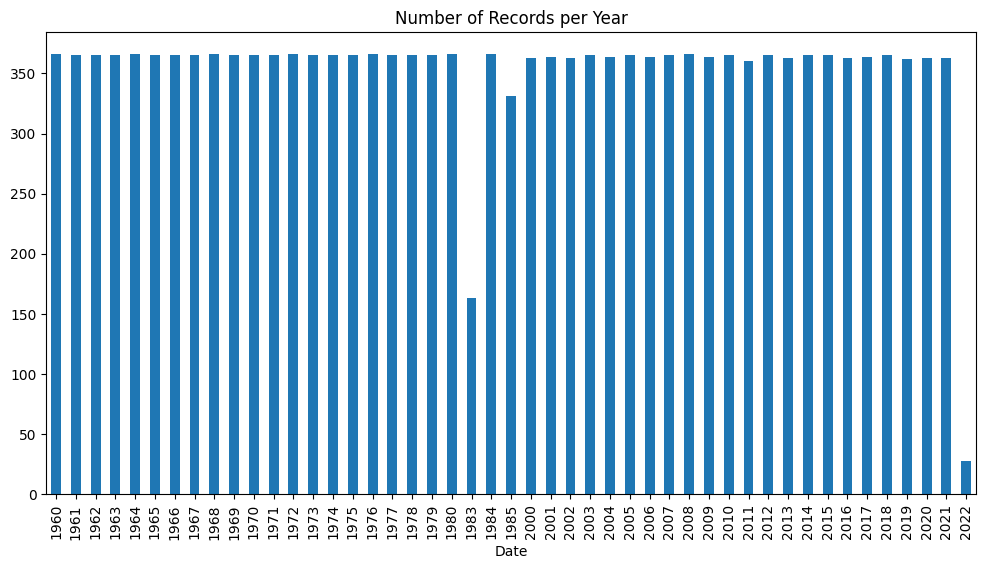

In [27]:
df['Date'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Number of Records per Year')

# few years records are missing .  

<Axes: xlabel='Max_Temp'>

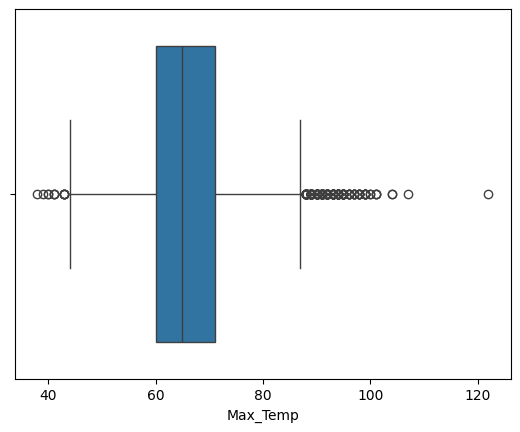

In [28]:
# outliers handling.
sns.boxplot(x=df['Max_Temp'])
# outliers present.

In [29]:
q1 = df['Max_Temp'].quantile(0.25)
q3 = df['Max_Temp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Max_Temp'] >= lower_bound) & (df['Max_Temp'] <= upper_bound)]

<Axes: xlabel='Min_Temp'>

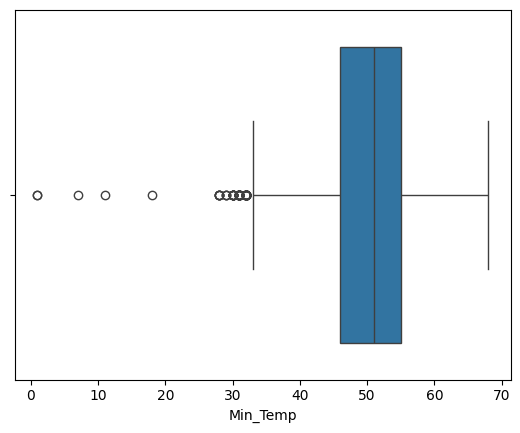

In [30]:
sns.boxplot(x=df['Min_Temp']) # outliers present.

In [31]:
q1 = df['Min_Temp'].quantile(0.25)
q3 = df['Min_Temp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Min_Temp'] >= lower_bound) & (df['Min_Temp'] <= upper_bound)]

In [ ]:
# we dont remove outliers from precipitation , snow fall coz then the model may assume that it doesnt rain at all, or no snow fall at all. (since the rain fall and snow fall periods may be short).

In [32]:
df.head()

,Date,Max_Temp,Min_Temp,Precipitation
2,1960-01-03,54.0,35.0,0.0
3,1960-01-04,54.0,36.0,0.0
4,1960-01-05,55.0,33.0,0.0
5,1960-01-06,53.0,38.0,0.0
6,1960-01-07,56.0,46.0,0.0


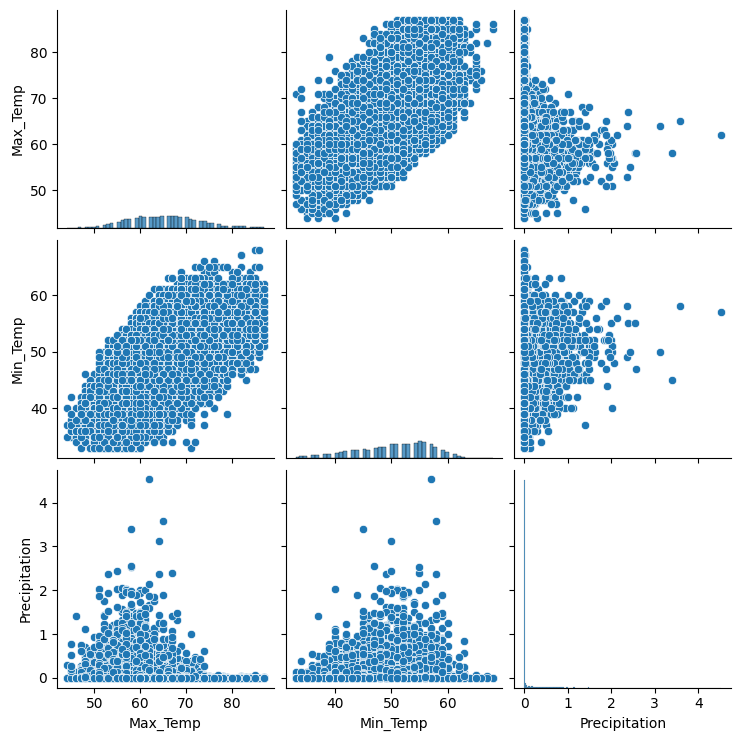

In [33]:
import seaborn as sns
sns.pairplot(data = df)

In [ ]:
# considering the max temp as target, min temp is not stable, as it is highly influenced by night time weather conditions. so max temp would be better.
# creating the label (target) to predict tomorrow’s weather.
df['target'] = df.shift(-1)['Max_Temp']
df

,Date,Max_Temp,Min_Temp,Precipitation,target
2,1960-01-03,54.0,35.0,0.0,54.0
3,1960-01-04,54.0,36.0,0.0,55.0
4,1960-01-05,55.0,33.0,0.0,53.0
5,1960-01-06,53.0,38.0,0.0,56.0
6,1960-01-07,56.0,46.0,0.0,54.0
...,...,...,...,...,...
16854,2022-01-24,60.0,39.0,0.0,57.0
16855,2022-01-25,57.0,43.0,0.0,57.0
16856,2022-01-26,57.0,41.0,0.0,67.0
16857,2022-01-27,67.0,39.0,0.0,64.0


In [36]:
df = df.iloc[:-1,:].copy()
df

,Date,Max_Temp,Min_Temp,Precipitation,target
2,1960-01-03,54.0,35.0,0.0,54.0
3,1960-01-04,54.0,36.0,0.0,55.0
4,1960-01-05,55.0,33.0,0.0,53.0
5,1960-01-06,53.0,38.0,0.0,56.0
6,1960-01-07,56.0,46.0,0.0,54.0
...,...,...,...,...,...
16853,2022-01-23,60.0,41.0,0.0,60.0
16854,2022-01-24,60.0,39.0,0.0,57.0
16855,2022-01-25,57.0,43.0,0.0,57.0
16856,2022-01-26,57.0,41.0,0.0,67.0


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
X = df[['Max_Temp', 'Min_Temp', 'Precipitation']]
y = df['target']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [45]:
y_pred_lr = lr.predict(X_test)

In [46]:
df1 = pd.DataFrame({
    'y_actual': y_test, 
    'y_predicted': y_pred_lr
})
df1['error'] = df1['y_actual']-df1['y_predicted']
df1['abs_error'] = abs(df1['error'])
mean_abs_err = df1['abs_error'].mean()
mean_abs_err

np.float64(3.3376995002979752)

In [47]:
df1

,y_actual,y_predicted,error,abs_error
1131,71.0,66.131617,4.868383,4.868383
7995,66.0,65.689639,0.310361,0.310361
6017,87.0,70.357518,16.642482,16.642482
300,71.0,65.942468,5.057532,5.057532
9752,70.0,69.726392,0.273608,0.273608
...,...,...,...,...
13153,63.0,60.202430,2.797570,2.797570
894,66.0,64.995778,1.004222,1.004222
12116,61.0,62.261270,-1.261270,1.261270
11896,69.0,68.465084,0.534916,0.534916


In [48]:
# comparing train vs test performance.
from sklearn.metrics import r2_score

In [49]:
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

In [ ]:
print(r2_train)
print(r2_test)

# r2 score of train and test is approx equal. (slight underfitting--> (no need of lasso/ridge), but we need to improve features to improve the r2 scores.)

0.6748364329742018
0.6762379860559485


In [51]:
r2score = r2_score(y_test, y_pred_lr)

In [53]:
print(f"R2 score of the model: {round(r2score, 4)*100}%")   
# the model explains 67.62% variance in max temp prediction.

R2 score of the model: 67.62%


The Linear Regression model achieved an R² score of 0.676, which means it can explain about 67.6% of the variation in the maximum temperature.
The training and testing scores are almost the same, so the model is not overfitting.
However, the score is not very high, which shows that the model is slightly underfitting and needs better features to improve performance.

In [55]:
# improving features. 
# weather heavily depends on previous days, so including lag. 
df['Max_Temp_lag'] = df['Max_Temp'].shift(1)
df['Min_Temp_lag'] = df['Min_Temp'].shift(1)

In [56]:
# rolling avg over a past few days.
df["max_temp_roll3"] = df["Max_Temp"].rolling(3).mean()
df["max_temp_roll7"] = df["Max_Temp"].rolling(7).mean()

In [58]:
df.dropna(inplace=True)

In [60]:
# improved features, now again training the lr model and testing again.
X = df[['Max_Temp', 'Min_Temp', 'Precipitation', 'Max_Temp_lag', 'Min_Temp_lag', 'max_temp_roll3', 'max_temp_roll7']]
y = df['target']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [70]:
r2_train_imp = lr.score(X_train, y_train)
r2_test_imp = lr.score(X_test, y_test)

In [ ]:
print(r2_train_imp)
print(r2_test_imp)

# differences are lowered, but still mild underfitting

0.686495181089045
0.6875963115747061


we use ridge when correlated features affect model stability, and we avoid Lasso when all features are meaningful.

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# ridge regression requires feature scaling.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
ridge_reg = Ridge()

In [92]:
import numpy as np
params = {'alpha': np.logspace(-4, 1, 20)}

In [110]:
ridge_cv = GridSearchCV(
    estimator=ridge_reg,
    param_grid=params, 
    scoring='r2', 
    cv=5
)

In [111]:
ridge_cv.fit(X_train_scaled, y_train)
# alpha = np.float64(0.4832930238571752) was chosen

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Ridge()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.",{'alpha': array([1.0000...00000000e+01])}
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate parameter indexe

In [112]:
print(ridge_cv.best_params_)  

{'alpha': np.float64(2.9763514416313193)}


In [113]:
print(ridge_cv.best_score_)    # best mse

0.6859691332207806


In [114]:
ridge_pred = ridge_cv.predict(X_test_scaled)

In [115]:
score = r2_score(y_test, ridge_pred)
print(f"R^2 Score: {score}")  

# r2 score improved as compared to linear regression.

R^2 Score: 0.6875773022517093


In [116]:
r2_train_ridge = ridge_cv.score(X_train_scaled, y_train)
r2_test_ridge = ridge_cv.score(X_test_scaled, y_test)

In [117]:
print(r2_train_ridge)
print(r2_test_ridge)

0.6864949388590611
0.6875773022517093


In [118]:
print("Linear Regression coefficients:")
print(lr.coef_)

Linear Regression coefficients:
[ 0.63170129  0.06311051 -1.93022359 -0.08132685  0.08732621 -0.03767961
  0.2657451 ]


In [119]:
print("Ridge coefficients:")
print(ridge_cv.best_estimator_.coef_)

Ridge coefficients:
[ 4.81105215  0.40937967 -0.35414996 -0.62751813  0.56759884 -0.24809572
  1.72480743]


- Ridge = stability and reliability, not better accuracy.
- Linear Regression range: 0.06 to -1.93 = HUGE gap (one coefficient is 32x bigger)
- Ridge range: 0.25 to 4.81 = smaller gap (biggest is only 19x the smallest)
- Ridge made the coefficients more balanced relative to each other.
- Why we used Ridge: Weather data has correlated features (temperature, humidity, pressure all relate to each other). This makes Linear Regression unstable - it gives extreme weights to some features.
- Ridge prevents any single feature from getting extreme coefficients, making your model more reliable and robust when predicting on new data.
- Ridge = same accuracy, but way more stable
- since weather features such as precipitation , min temp, max temp are correlated and imp for weather prediction, we used ridge.(it is used when features are correlated).
- we cant use lasso here coz it does feature selection. it wont consider all features. but here all are imp so we reject lasso.

In [121]:
# predictions. 
df2 = pd.DataFrame({
    'actual': y_test, 
    'predicted': ridge_pred
})
df2['error'] = df2['actual']-df2['predicted']
df2['absolute_error'] = abs(df2['error'])
mean_abs_err = df2['absolute_error'].mean()
mean_abs_err

np.float64(3.306406045599489)

In [122]:
df2

,actual,predicted,error,absolute_error
1137,60.0,63.867189,-3.867189,3.867189
7995,66.0,65.235529,0.764471,0.764471
14221,70.0,70.094024,-0.094024,0.094024
306,60.0,67.801181,-7.801181,7.801181
9753,70.0,71.286230,-1.286230,1.286230
...,...,...,...,...
903,63.0,69.516832,-6.516832,6.516832
12051,71.0,59.482935,11.517065,11.517065
10199,58.0,59.768949,-1.768949,1.768949
8348,60.0,63.370070,-3.370070,3.370070


In [ ]:
r2_score(y_test, ridge_pred)
# 68.75% variance in weather prediction.

0.6875773022517093